# Modelling waning immunity

Many infections only provide temporary immunity after recovery - immunity can wane over time, returning those previously infected (or vaccinated) individuals to the susceptible pool.

In [2]:
import matplotlib.pyplot as plt
import scipy.integrate
import numpy as np
import math
from scipy.integrate import odeint

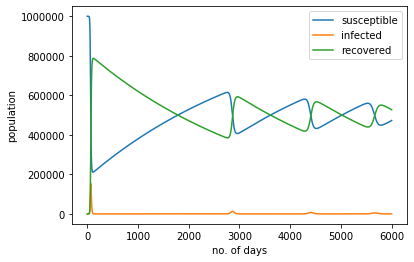

In [3]:
betta=0.4 # Daily infection rate
nu=0.2
sigma=1/(10*365)
def du_dt(u,t):
    lamda=betta*u[1]/1000000
    return([-u[0]*(lamda)+u[2]*sigma,u[0]*lamda - nu*u[1],u[1]*nu-u[2]*sigma])
x=np.linspace(0,6000,5999)
y0=[999999,1,0]
y=odeint(du_dt,y0,x)
plt.plot(x,y[:,0],label="susceptible")
plt.plot(x,y[:,1],label="infected")
plt.plot(x,y[:,2],label="recovered")
plt.xlabel("no. of days")
plt.ylabel("population")
plt.legend()
plt.show()

# Case Study

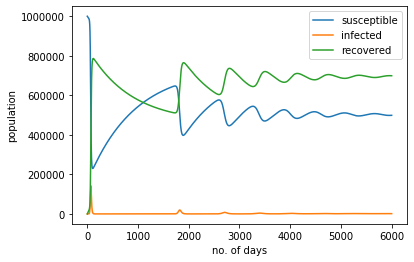

In [5]:
# A model to simulate a virus infected on animals in a closed environment, ie, no population movement
betta=0.4 # Daily infection rate
nu=0.2 # recovery rate 
sigma=1/(10*365) # wanning of immumity rate ie, the vaccine is effective for 10 years
mu=1/(3*365) # death rate ie, average lifespan of animal is 3 years
b=1/(3*365) # birth rate 
p=0.4 # proportion of births vaccinated
pop=999999+1 # population of animal
def du_dt(u,t):
    lamda=betta*u[1]/1000000
    return([-u[0]*(lamda)+u[2]*sigma+(1-p)*b*pop-mu*u[0],u[0]*lamda - nu*u[1]-mu*u[1],u[1]*nu-u[2]*sigma-mu*u[2]+(1-p)*b*pop])
x=np.linspace(0,6000,5999)
y0=[999999,1,0]
y=odeint(du_dt,y0,x)
plt.plot(x,y[:,0],label="susceptible")
plt.plot(x,y[:,1],label="infected")
plt.plot(x,y[:,2],label="recovered")
plt.xlabel("no. of days")
plt.ylabel("population")
plt.legend()
plt.show()